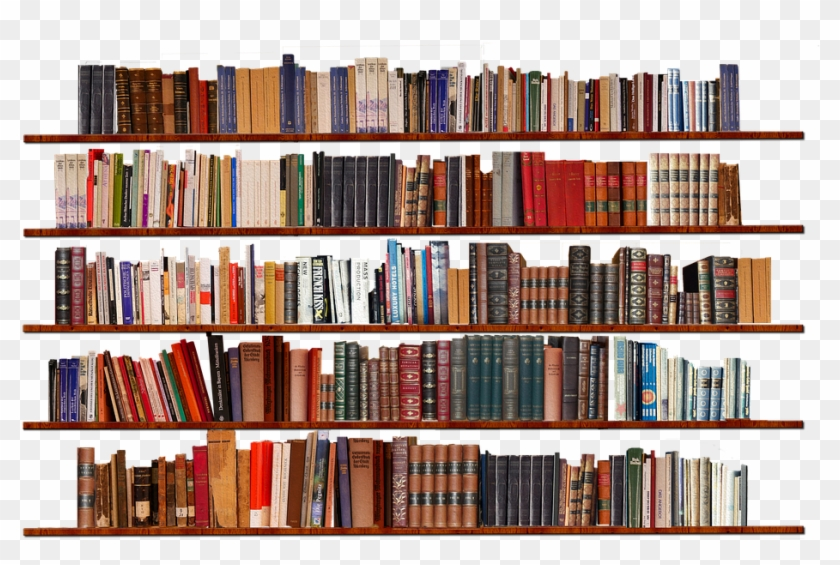


In [1]:
# Importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
pd.set_option('max_colwidth', 1000)

print("Libraries Imported")

Libraries Imported


## Data Import

In [2]:
books = pd.read_csv('BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
users = pd.read_csv('BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


## Data Exploration

In [3]:
display(books.head(1))
print("Books Data Set : Records {} and Features {}\n".format(books.shape[0],books.shape[1]))
print("Duplicate Records?",books.duplicated().sum())
print("\nNull Values?")
books.isnull().sum()

ISBN           Book-Title         Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology  Mark P. O. Morford                2002   

                 Publisher  \
0  Oxford University Press   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg

Books Data Set : Records 271360 and Features 8

Duplicate Records? 0

Null Values?


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [4]:
display(users.head(1))
print("Users Data Set : Records {} and Features {}\n".format(users.shape[0],users.shape[1]))
print("Duplicate Records?",users.duplicated().sum())
print("\nNull Values?")
users.isnull().sum()

User-ID            Location  Age
0        1  nyc, new york, usa  NaN

Users Data Set : Records 278858 and Features 3

Duplicate Records? 0

Null Values?


User-ID          0
Location         0
Age         110762
dtype: int64

In [5]:
display(ratings.head(1))
print("Ratigs Data Set : Records {} and Features {}\n".format(ratings.shape[0],ratings.shape[1]))
print("Duplicate Records?",ratings.duplicated().sum())
print("Null Values?")
ratings.isnull().sum()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0

Ratigs Data Set : Records 1149780 and Features 3

Duplicate Records? 0
Null Values?


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Merge Data sets 

In [6]:
data = books.merge(ratings,on='ISBN')
data.head()

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher  \
0  Oxford University Press   
1    HarperFlamingo Canada   
2    HarperFlamingo Canada   
3    HarperFlamingo Canada   
4    HarperFlamingo Canada   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
3  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
4  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  User-ID  \
0  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg        2   
1  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg        8   
2  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    11400   
3  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    11676   
4  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    41385   

   Book-Rating  
0            0  
1            5  
2            0  
3            8  
4            0

## User preference module

In [7]:
def user_preference(x):
    
    ### creating adictionary that rutuens the elements of an ISBN
    
    result= data[data['ISBN']==x].set_index('ISBN')
    result= result.T.to_dict('list')
    
    return result

In [8]:
user_preference('0002005018')

{'0002005018': ['Clara Callan',
  'Richard Bruce Wright',
  2001,
  'HarperFlamingo Canada',
  'http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg',
  263325,
  6]}

.

In [9]:
def join_author(Book_Author): #this function removes the space between the authors names to the system doesnt read two authors as one  
    result=str(Book_Author).lower()
    return(result.replace(' ',''))

data['Book-Author']=data['Book-Author'].apply(join_author)

#### converting book-title to lower case
data['Book-Title'] = data['Book-Title'].str.lower()

data.head()

ISBN           Book-Title         Book-Author Year-Of-Publication  \
0  0195153448  classical mythology     markp.o.morford                2002   
1  0002005018         clara callan  richardbrucewright                2001   
2  0002005018         clara callan  richardbrucewright                2001   
3  0002005018         clara callan  richardbrucewright                2001   
4  0002005018         clara callan  richardbrucewright                2001   

                 Publisher  \
0  Oxford University Press   
1    HarperFlamingo Canada   
2    HarperFlamingo Canada   
3    HarperFlamingo Canada   
4    HarperFlamingo Canada   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
3  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
4  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  User-ID  \
0  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg        2   
1  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg        8   
2  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    11400   
3  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    11676   
4  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg    41385   

   Book-Rating  
0            0  
1            5  
2            0  
3            8  
4            0

.

In [10]:
def clean_booktitle(title):
    return str(title).title().strip()
    
data['Book-Title'] = data['Book-Title'].apply(clean_booktitle)

In [11]:
'''
Due to memory contraint, retaining those records where 
1. users who have voted more than 200 times
2. books that are voted more than 50 times
'''
print("Shape before filtering:",data.shape)
data = data[data['User-ID'].map(data['User-ID'].value_counts()) > 200] #users who voted more than 200 times  

data = data[data['Book-Title'].map(data['Book-Title'].value_counts()) > 50] #books that are voted more than 50 times

data = data.reset_index(drop=True)
print("Shape after filtering:",data.shape)

Shape before filtering: (1031136, 10)
Shape after filtering: (58685, 10)


## Top N Books

In [12]:
def get_top_N_books(data,n=100):
    
    rating_count = data.groupby('Book-Title').count()['Book-Rating'].reset_index()    
    rating_count.rename(columns={'Book-Rating':'Number_Of_Votes'},inplace=True) #rename Book-Rating to Number_of_Votes
    
    rating_avg = data.groupby('Book-Title')['Book-Rating'].mean().reset_index() 
    rating_avg.rename(columns={'Book-Rating':'Ratings-Average'},inplace=True) #rename Book-Title tp Rating_Average
    
    popular_books = rating_count.merge(rating_avg,on='Book-Title')
    
    def w_rate(x):
        v = x['Number_Of_Votes']
        R = x['Ratings-Average']
                
        return ((v * R) + (m*C))/(v+m)

    C = popular_books['Ratings-Average'].mean()
    m = popular_books['Number_Of_Votes'].quantile(0.90)
    
    # Filter out all qualified books into a new DataFrame
    popular_books = popular_books[popular_books['Number_Of_Votes'] >= m]
    
    popular_books['Polularity-Score'] = popular_books.apply(w_rate,axis=1)
    
    popular_books = popular_books.sort_values(by='Polularity-Score',ascending=False)

    return popular_books[['Book-Title','Ratings-Average','Number_Of_Votes','Polularity-Score']].reset_index(drop=True).head(n)

n =10
print("Top {} popular books".format(n))
display(get_top_N_books(data,25))

Top 10 popular books


Book-Title  \
0                           Harry Potter And The Prisoner Of Azkaban (Book 3)   
1                            Harry Potter And The Chamber Of Secrets (Book 2)   
2                                                       To Kill A Mockingbird   
3                                                           A Wrinkle In Time   
4                                                   The Lovely Bones: A Novel   
5            Harry Potter And The Sorcerer'S Stone (Harry Potter (Paperback))   
6                                                           The Da Vinci Code   
7                                         The Red Tent (Bestselling Backlist)   
8                                                     The Secret Life Of Bees   
9   Tuesdays With Morrie: An Old Man, A Young Man, And Life'S Greatest Lesson   
10                                                                Good In Bed   
11                                                      Bridget Jones'S Diary   
12                                                 Interview With The Vampire   
13                                                  Girl With A Pearl Earring   
14                                                              Jurassic Park   
15                                                               Dreamcatcher   
16                                               Suzanne'S Diary For Nicholas   
17                                                                 The Client   
18                                                        1St To Die: A Novel   
19                                                                 Life Of Pi   
20                         Where The Heart Is (Oprah'S Book Club (Paperback))   
21                                                        Angels &Amp; Demons   
22                                                     Me Talk Pretty One Day   
23                                                                   The Firm   
24                                                                The Partner   

    Ratings-Average  Number_Of_Votes  Polularity-Score  
0          4.414815              135          3.202962  
1          3.988636              176          3.120212  
2          3.690608              181          2.960723  
3          3.723077              130          2.833788  
4          3.203065              261          2.784616  
5          3.316384              177          2.735456  
6          3.157407              216          2.701690  
7          3.083832              167          2.585134  
8          2.848039              204          2.496362  
9          3.000000              139          2.489907  
10         2.797619              168          2.425453  
11         2.596958              263          2.381132  
12         2.548571              175          2.291098  
13         2.444444              162          2.221866  
14         2.426901              171          2.218554  
15         2.408805              159          2.199948  
16         2.424460              139          2.192509  
17         2.361582              177          2.184967  
18         2.375000              160          2.182017  
19         2.354286              175          2.179623  
20         2.348315              178          2.177873  
21         2.301587              189          2.156066  
22         2.340426              141          2.150498  
23         2.150685              219          2.073882  
24         2.177632              152          2.070159

## Item Based Recommendation

In [13]:
data_matrix = data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)

In [14]:
similarity_scores = cosine_similarity(data_matrix)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

You read "Skeleton Crew" by stephenking


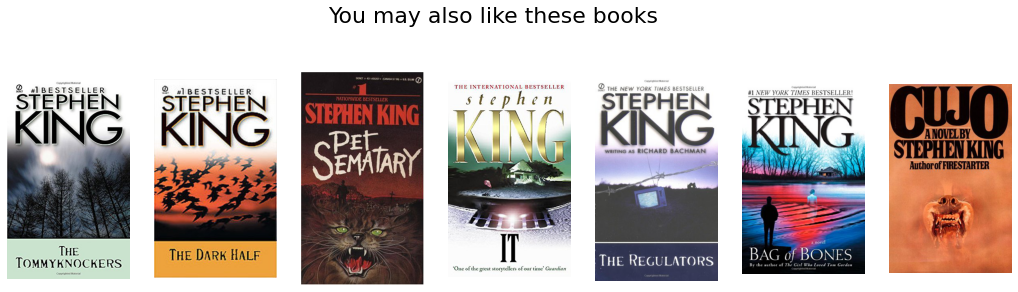

You read "The Simple Truth" by davidbaldacci


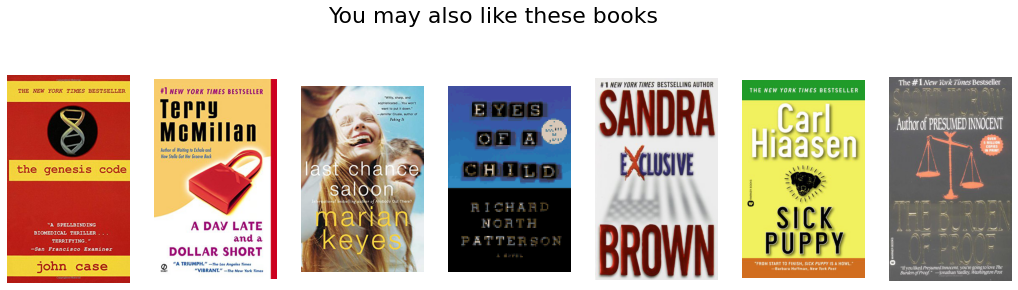

You read "The Lovely Bones: A Novel" by alicesebold


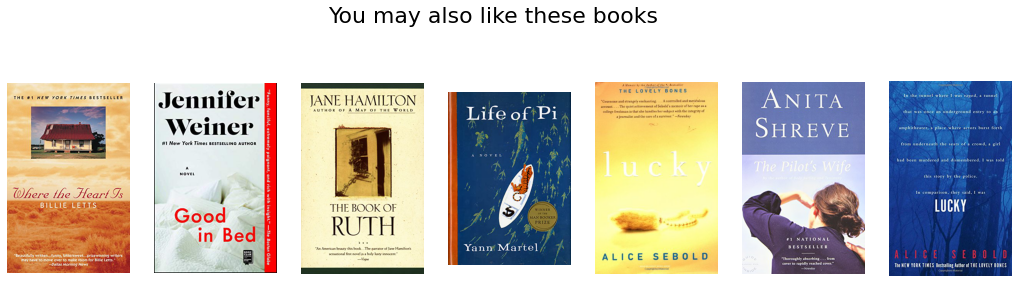

You read "Shadowfires" by deanr.koontz


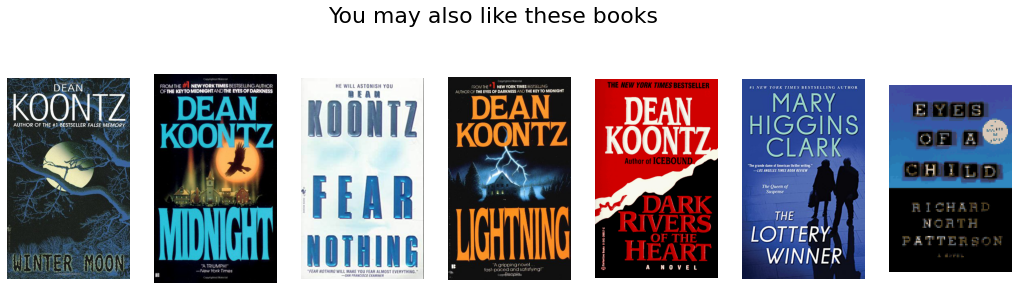

In [15]:
def recommend_books(data,book_name):
    
    if data['Book-Title'].str.contains(book_name).any()==False:
        return -1 #cosine similarity valies exist between 0&1 hence if any value returns -1 it means it doesnt exist 
        
    index = np.where(data_matrix.index==book_name)[0][0]

    similar_items = list(enumerate(similarity_scores[index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse=True)[1:8]

    book_recommend = []
    for i in similar_items:
        temp_df = data[data['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))       
    return book_recommend
        
    
for i in range(5):
    title = random.choice(data['Book-Title'])

    book_recommend = recommend_books(data,title)
    if book_recommend == -1:
        #print("No recommendation found")
        pass
    else:
        
        n = len(book_recommend)
        author = data[data['Book-Title']==title]['Book-Author'].values
        
        print('You read "{}" by {}'.format(title,author[0]))
        fig, axs = plt.subplots(1, n,figsize=(18,5))
        fig.suptitle('You may also like these books', size = 22)

        for i in range(n):
            
            url = data.loc[data['Book-Title'] == book_recommend[i],'Image-URL-L'][:1].values[0]
            im = Image.open(requests.get(url, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")

        plt.show()   

## User Based Recommendation

In [16]:
similarity_scores_users = cosine_similarity(data_matrix.T)
similarity_scores_users 

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.12370028, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12370028, 1.        , ..., 0.        , 0.        ,
        0.06210701],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.06210701, ..., 0.        , 0.        ,
        1.        ]])

In [17]:
def get_user_fav(id):
    user_rec = data[data['User-ID'] == id].sort_values(['Book-Rating'],ascending=False)[0:7]
        
    return (user_rec['Book-Title'].values)

def user_recommend(data,u_id):
    
    if u_id not in data['User-ID'].values:
        return -1
    
    index = np.where(data_matrix.T.index==u_id)[0][0]
    
    similar_users = list(enumerate(similarity_scores_users[index]))
    similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[1:5]

    user_recommend = []
    for i in similar_users:
        temp_df = data[data['User-ID'] == data_matrix.T.index[i[0]]]
        user_recommend.extend(list(temp_df.drop_duplicates('User-ID')['User-ID'].values))       
    return user_recommend

def find_common(data,u,u_id):
    
    x = data[data['User-ID']==u_id] # inp user favourites
    
    recommend_books = []
    
    for i in u:
        
        y = data[ (data['User-ID'] == i)] #similar
        
        books_for_user = y.loc[~y['Book-Title'].isin(x['Book-Title']),:] #no need to read books already read by user
        
        books_for_user = books_for_user.sort_values(['Book-Rating'],ascending=False)[0:7] #just keeping top 7 movies for each user
        
        recommend_books.extend(books_for_user['Book-Title'].values)
        recommend_books = list(dict.fromkeys(recommend_books)) #remove duplicate movies
    
    return recommend_books[0:8]

Book Recommendation for User 150968


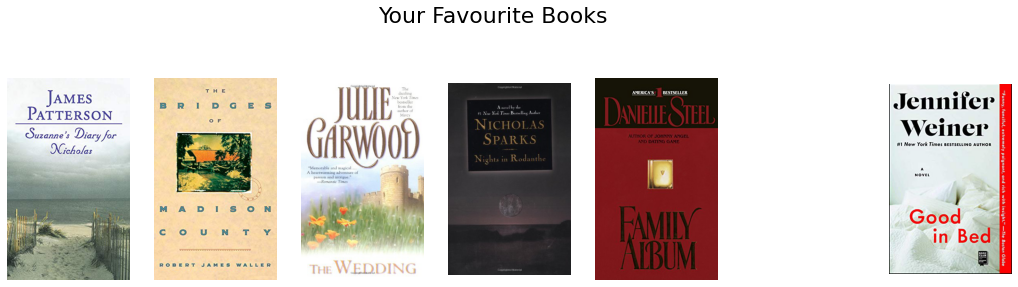

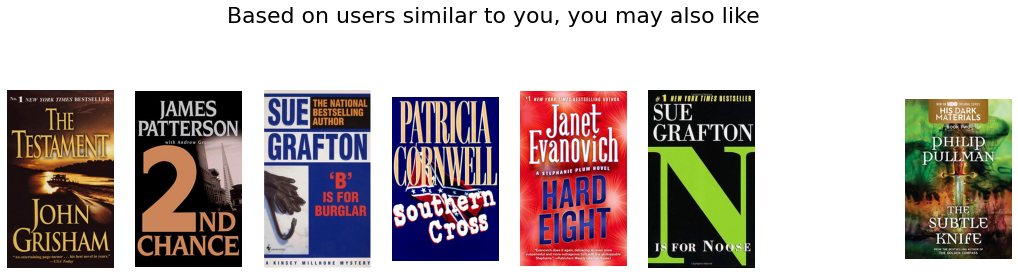

Book Recommendation for User 221445


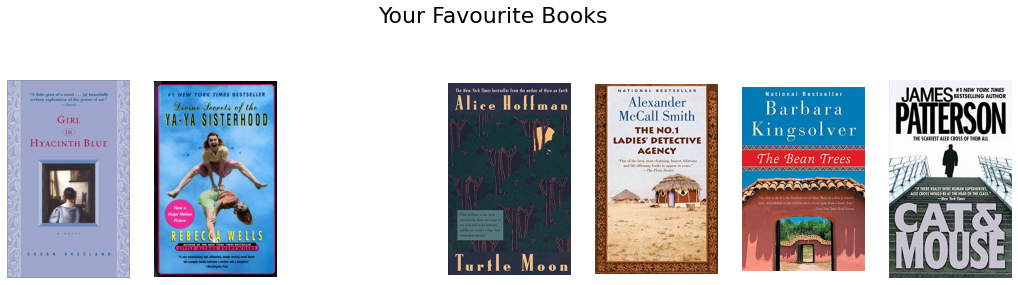

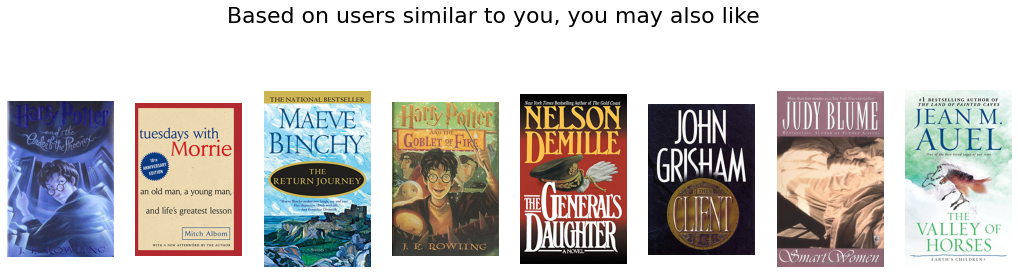

Book Recommendation for User 266865


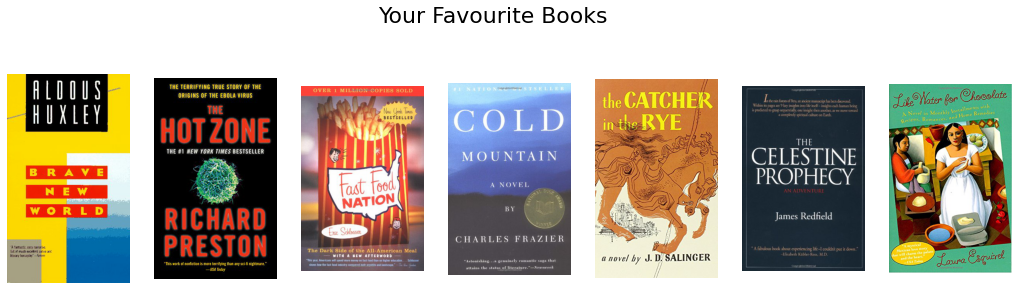

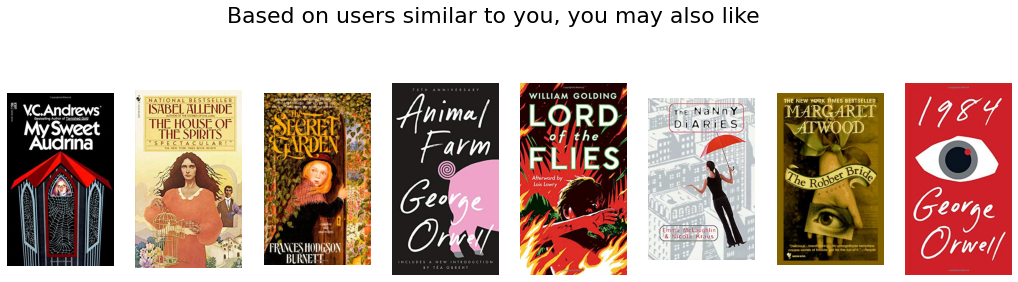

Book Recommendation for User 230522


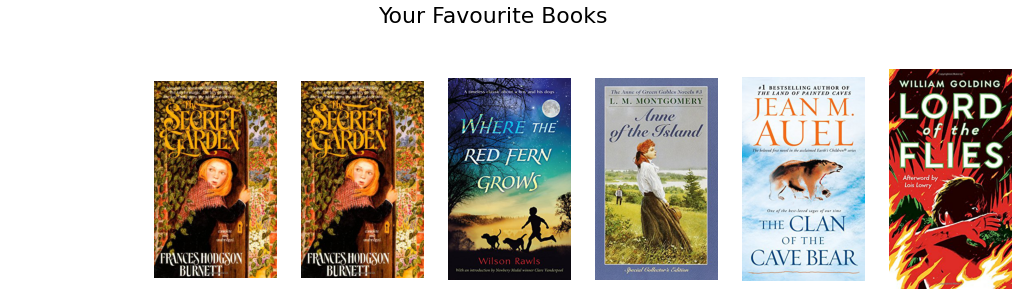

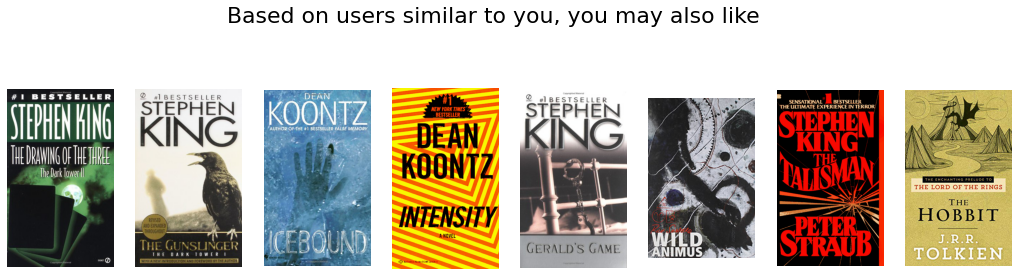

Book Recommendation for User 195694


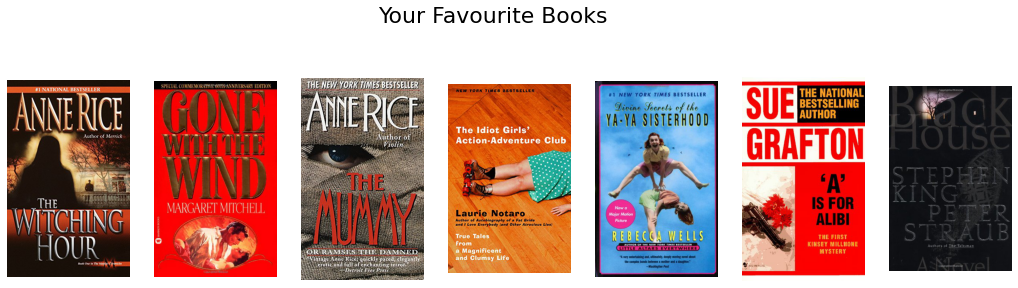

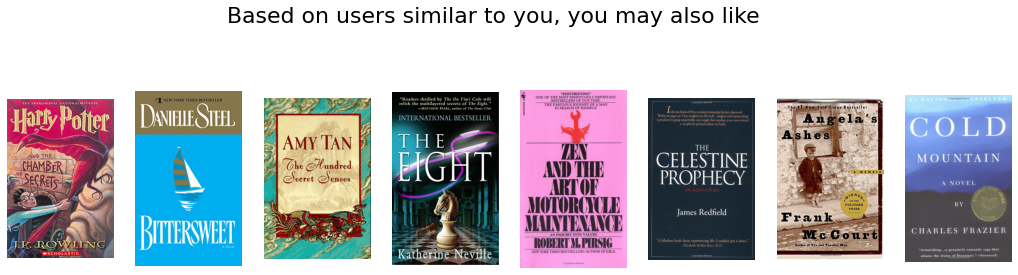

In [18]:
for i in range(5):
    u_id = random.choice(data['User-ID'])

    usr_fav = get_user_fav(u_id)

    n = len(usr_fav)

    print("Book Recommendation for User {}".format(u_id))
    fig, axs = plt.subplots(1, n,figsize=(18,5))
    fig.suptitle('Your Favourite Books', size = 22)

    for i in range(n):
        url = data.loc[data['Book-Title'] == usr_fav[i],'Image-URL-L'][:1].values[0]
        im = Image.open(requests.get(url, stream=True).raw)
        axs[i].imshow(im)
        axs[i].axis("off")

    plt.show()   

    rec_users = user_recommend(data,u_id)
   
    if rec_users == -1:
        pass
    else:
        book_recommend = find_common(data,rec_users,u_id)

        n = len(book_recommend)
        fig, axs = plt.subplots(1, n,figsize=(18,5))
        fig.suptitle('Based on users similar to you, you may also like', size = 22)

        for i in range(n):
            url = data.loc[data['Book-Title'] == book_recommend[i],'Image-URL-L'][:1].values[0]
            im = Image.open(requests.get(url, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")

        plt.show()   

.